In [1]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
data = pd.read_csv(file_path)

# List of unique time categories
time_categories = data['Time'].unique()

# Save separate CSV files for each wave
for time in time_categories:
    # Filter the data for each time category
    wave_data = data[data['Time'] == time]
    
    # Define the output file path for each wave
    output_file = f"D:\\Ph.D Course Material 2022\\My Dessertation\\0 My PhD Munuscript Drafts\\5 Machine Learning\\Dataset\\wave_{time}.csv"
    
    # Save the wave data to a new CSV file
    wave_data.to_csv(output_file, index=False)
    print(f"Wave {time} dataset saved to {output_file}")

Wave 2002 dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2002.csv
Wave 2006 dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2006.csv
Wave 2009 dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2009.csv
Wave 2013 dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2013.csv
Wave 2016 dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2016.csv


In [2]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
data = pd.read_csv(file_path)

# Ensure "Time" and "Subject" columns exist
if "Time" not in data.columns or "Subject" not in data.columns:
    raise ValueError("The dataset must contain 'Time' and 'Subject' columns.")

# Columns to replace
columns_to_replace = ["Measles", "DPT", "Polio"]

# Create separate datasets for 2002 and 2006
data_2002 = data[data["Time"] == 2002].copy()
data_2006 = data[data["Time"] == 2006][["Subject"] + columns_to_replace].copy()

# Merge data_2002 with data_2006 based on "Subject" to update values
wave_2002_2 = data_2002.merge(data_2006, on="Subject", suffixes=("", "_2006"), how="left")

# Replace 2002 values with 2006 values for selected columns
for col in columns_to_replace:
    wave_2002_2[col] = wave_2002_2[col + "_2006"]
    wave_2002_2.drop(columns=[col + "_2006"], inplace=True)

# Save the new dataset
output_file = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2002(2).csv"
wave_2002_2.to_csv(output_file, index=False)

print(f"Wave_2002(2) dataset saved to {output_file}")


Wave_2002(2) dataset saved to D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\wave_2002(2).csv


In [4]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
baseline_data = pd.read_csv(file_path)

# Display the first few rows
print(baseline_data.head())

   Subject  Time  Region  Residence  ch_sex  ch_age_mon        BMI  \
0        1  2002      14          1       1          14  15.111111   
1        2  2002      14          1       1           8  16.219723   
2        3  2002      14          1       1          12  12.602394   
3        4  2002      14          1       1          11  18.845467   
4        5  2002      14          1       2          13  14.167650   

   ch_longterm_health_problem  ch_health_compared_peers  \
0                           0                         2   
1                           0                         2   
2                           0                         1   
3                           0                         2   
4                           0                         3   

   ch_health_general_new  ...  Measles  DPT  Polio  HIB  delivery  chinjury  \
0                      2  ...      1.0  1.0    1.0    0         1         0   
1                      1  ...      1.0  1.0    1.0    1         1 

In [5]:
# Group by 'Time' and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['Time', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status at each time point:")
print(nutrition_frequencies)


Frequencies of Nutrition_Status at each time point:
Nutrition_Status    1   2    3   4    5    6    8
Time                                             
2002              922  39  329  64  372  121  147


In [6]:
# Group by 'Time', 'ch_sex', and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['Time', 'ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status by gender at each time point:")
print(nutrition_frequencies)


Frequencies of Nutrition_Status by gender at each time point:
Nutrition_Status    1   2    3   4    5   6   8
Time ch_sex                                    
2002 1            433  17  195  38  208  65  91
     2            489  22  134  26  164  56  56


In [7]:
# Exclude the first three columns and select the rest as independent variables (X)
X = baseline_data.iloc[:, 3:-1].values
# target variable column name found the last column
y = baseline_data.iloc[:, -1].values

In [8]:
# Convert the NumPy array to a DataFrame for inspection
X_df = pd.DataFrame(X)

# Check for non-numeric values and data types
# print(X_df.head())
print(X_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())


C:\Users\getne\AppData\Local\Temp\ipykernel_12344\351229467.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30    85
31    85
32    85
33     0
34     0
35     0
36     0
37     0
38     0
dtype: int64


In [9]:
# Convert non-numeric values to NaN and then handle missing values
X_cleaned_df = X_df.apply(pd.to_numeric, errors='coerce')
X_cleaned_df.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs

# Convert back to a NumPy array
X_cleaned = X_cleaned_df.to_numpy()

C:\Users\getne\AppData\Local\Temp\ipykernel_12344\2503071283.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_cleaned_df.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_cleaned)

In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Convert to DataFrame if not already
X_df = pd.DataFrame(X, columns=baseline_data.columns[3:-1])  # Use original column names

# Ensure all values are numeric and handle missing data
X_df = X_df.apply(pd.to_numeric, errors='coerce')
X_df.fillna(X_df.mean(), inplace=True)  # Fill NaNs with column mean

# Convert back to NumPy array
X_cleaned = X_df.to_numpy()

# Feature selection using SelectKBest
k_best_features = 14  # Adjust as needed
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = selector.fit_transform(X_cleaned, y)  # Fit selector

# Get selected feature names
selected_feature_names = X_df.columns[selector.get_support()]  # Get names of selected features

# Get the feature scores
feature_scores_df = pd.DataFrame({
    'Feature': X_df.columns,  # Use original feature names
    'Score': selector.scores_
})

# Print the feature scores
print("Feature scores:")
print(feature_scores_df.sort_values(by='Score', ascending=False))

# Save feature scores to CSV
feature_scores_save_path = r'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\feature_scores.csv'
feature_scores_df.to_csv(feature_scores_save_path, index=False)
print(f"Feature scores saved to: {feature_scores_save_path}")

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_scaled, columns=selected_feature_names)

# Add the target variable to the DataFrame
selected_features_df['Target'] = y

# Save the dataset with selected features
selected_features_save_path = r'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\selected_features_dataset.csv'
selected_features_df.to_csv(selected_features_save_path, index=False)

print(f"Selected features dataset saved to: {selected_features_save_path}")


Feature scores:
                          Feature       Score
3                             BMI  313.349620
21                Wealth_quintile   28.619384
23                    toiletq_new   23.011521
24          Access_to_electricity   20.742331
0                       Residence   20.433547
16                    MOM_Edu_New   13.391565
13                    Dad_Edu_New   12.436565
8                    Care_Edu_New   11.682959
27                    ch_religion   11.558584
2                      ch_age_mon   10.831148
28           Num_antenatal_visits   10.429339
17                   Head_Edu_New   10.324998
22  Access_to_safe_drinking_water   10.231810
6           ch_health_general_new   10.073030
34                       delivery    9.453266
25                   cookingq_new    7.890617
31                            DPT    6.213124
1                          ch_sex    4.522192
4      ch_longterm_health_problem    3.954902
30                        Measles    3.493670
20                

In [9]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "data/young_lives_ethiopia.csv"
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.iloc[:, 3:-1]  # Select all independent variables (excluding first 3 columns and last column)
y = data.iloc[:, -1]    # Target variable (last column)

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with column mean

# Feature selection (Select best 14 features)
k_best_features = 14
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained model
model_save_path = r'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl'
joblib.dump(model, model_save_path)
print(f"Model saved to: {model_save_path}")

# Save feature selection results
feature_scores_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selector.scores_[selector.get_support()]})
feature_scores_path = r'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\feature_scores.csv'
feature_scores_df.to_csv(feature_scores_path, index=False)
print(f"Feature scores saved to: {feature_scores_path}")


Model Accuracy: 0.4862

Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.75      0.66       193
           2       0.00      0.00      0.00         7
           3       0.28      0.13      0.18        70
           4       0.27      0.27      0.27        11
           5       0.31      0.28      0.30        57
           6       0.36      0.28      0.31        29
           8       0.36      0.41      0.38        32

    accuracy                           0.49       399
   macro avg       0.31      0.30      0.30       399
weighted avg       0.44      0.49      0.45       399

Model saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl
Feature scores saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\feature_scores.csv


In [12]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv(r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\baseline data.csv")

# Define independent (X) and target variable (y)
X = df.iloc[:, 3:-1].values  # Excluding first 3 columns and last column as target
y = df.iloc[:, -1].values    # Target variable is the last column

# Step 1: Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Using mean imputation
X_imputed = imputer.fit_transform(X)

# Step 2: Encode class labels to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts y to sequential numbers

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_encoded)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 5: Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

# # Step 9: Save the Model and Encoders
# model_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl"
# label_encoder_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl"
# scaler_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\scaler.pkl"
# imputer_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\imputer.pkl"

# joblib.dump(model, model_save_path)
# joblib.dump(label_encoder, label_encoder_save_path)
# joblib.dump(scaler, scaler_save_path)
# joblib.dump(imputer, imputer_save_path)

# print(f"Model saved to: {model_save_path}")
# print(f"Label encoder saved to: {label_encoder_save_path}")
# print(f"Scaler saved to: {scaler_save_path}")
# print(f"Imputer saved to: {imputer_save_path}")


C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [11:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.8838

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.76      0.71       187
           2       0.98      0.98      0.98       168
           3       0.85      0.81      0.83       198
           4       0.97      0.99      0.98       178
           5       0.81      0.73      0.77       185
           6       0.98      0.97      0.98       193
           8       0.97      0.95      0.96       182

    accuracy                           0.88      1291
   macro avg       0.89      0.89      0.89      1291
weighted avg       0.89      0.88      0.88      1291



In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from xgboost import plot_importance
# import numpy as np

# # 1. Class Distribution Before and After SMOTE
# plt.figure(figsize=(12, 6))

# # Plot original class distribution with counts
# plt.subplot(1, 2, 1)
# ax1 = sns.countplot(x=y_encoded)
# plt.title("Class Distribution (Before SMOTE)")
# for p in ax1.patches:
#     ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# # Plot resampled class distribution with counts
# plt.subplot(1, 2, 2)
# ax2 = sns.countplot(x=y_resampled)
# plt.title("Class Distribution (After SMOTE)")
# for p in ax2.patches:
#     ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# plt.tight_layout()
# plt.show()

# # 2. Feature Importance Plot (XGBoost)
# plt.figure(figsize=(10, 6))
# plot_importance(model, max_num_features=10, importance_type='weight', title='Top 10 Features Importance')
# plt.show()

# # 3. Confusion Matrix
# cm = confusion_matrix(y_test_original, y_pred_original)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()


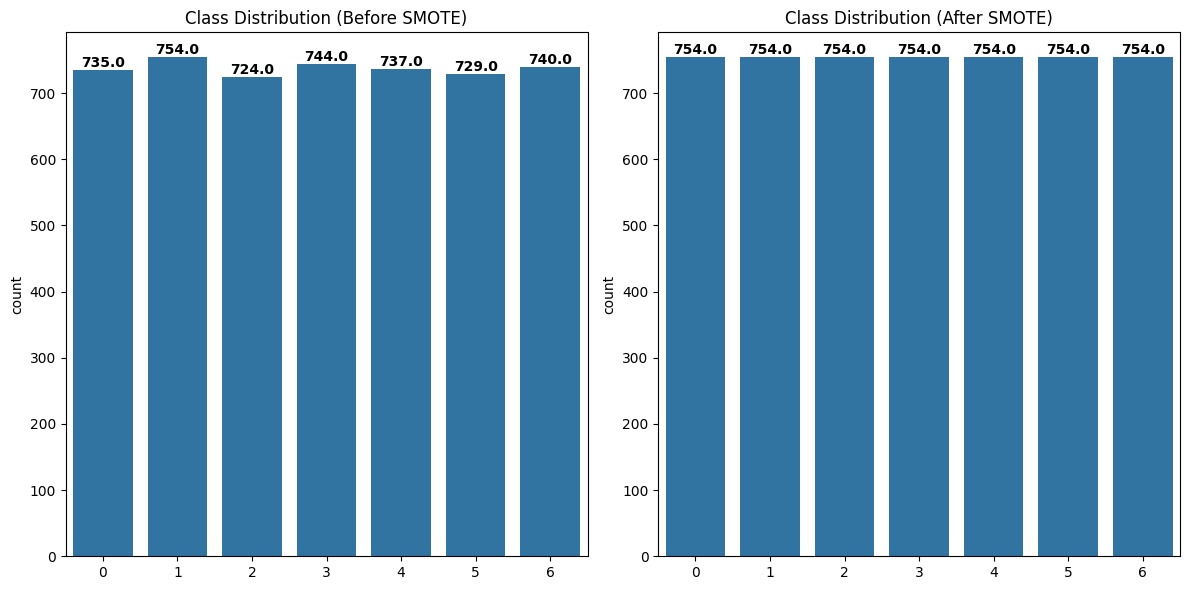

<Figure size 1000x600 with 0 Axes>

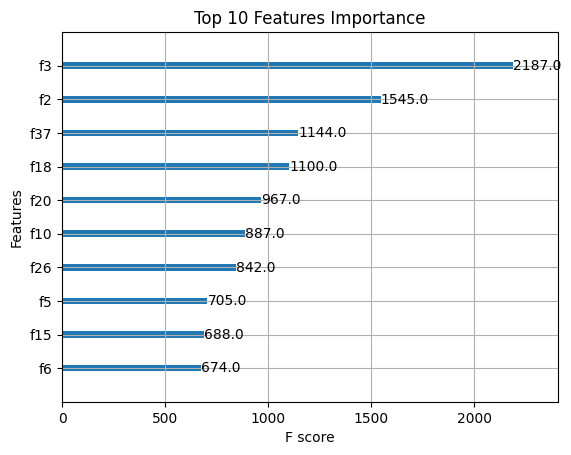

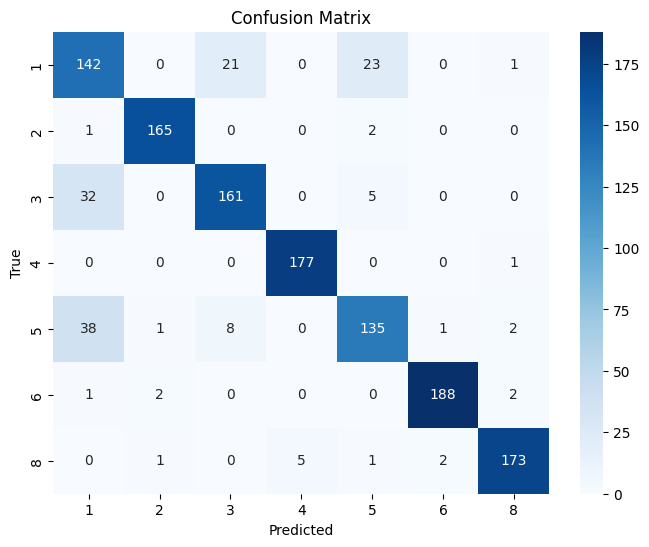

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
import numpy as np
from collections import Counter

# 1. Class Distribution Before SMOTE on the Training Data
plt.figure(figsize=(12, 6))

# Plot original class distribution with counts (before SMOTE)
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train)
plt.title("Class Distribution (Before SMOTE)")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Apply SMOTE only on the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot resampled class distribution with counts (after SMOTE)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_resampled)
plt.title("Class Distribution (After SMOTE)")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Feature Importance Plot (XGBoost)
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='weight', title='Top 10 Features Importance')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [11:00:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.8838

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.76      0.71       187
           2       0.98      0.98      0.98       168
           3       0.85      0.81      0.83       198
           4       0.97      0.99      0.98       178
           5       0.81      0.73      0.77       185
           6       0.98      0.97      0.98       193
           8       0.97      0.95      0.96       182

    accuracy                           0.88      1291
   macro avg       0.89      0.89      0.89      1291
weighted avg       0.89      0.88      0.88      1291

Model saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl
Label encoder saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl
Scaler saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscri

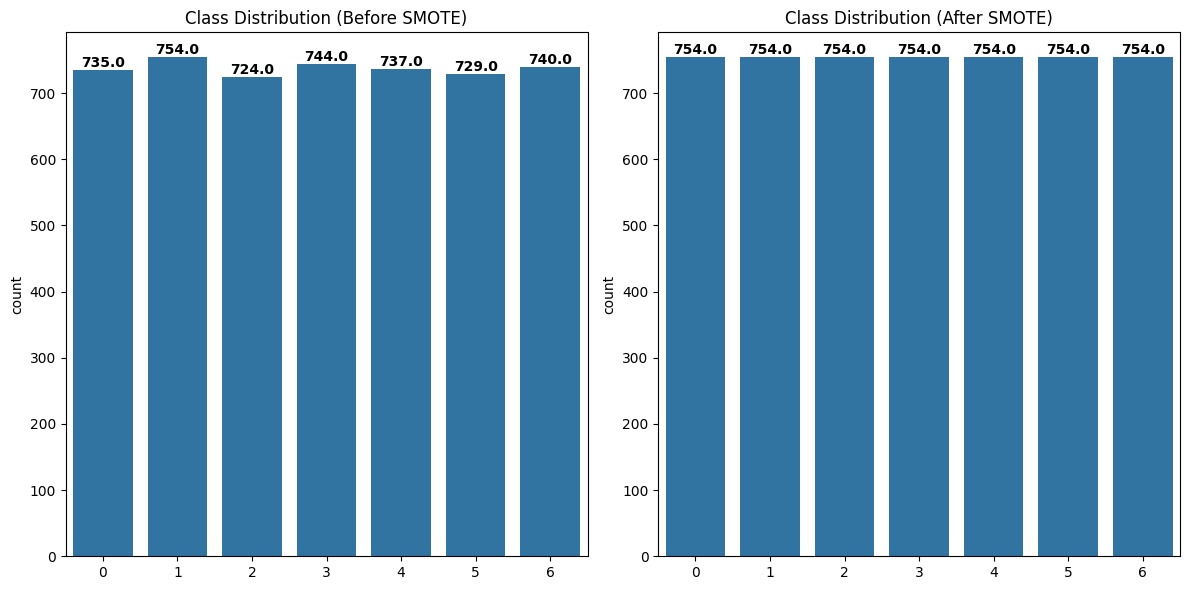

<Figure size 1000x600 with 0 Axes>

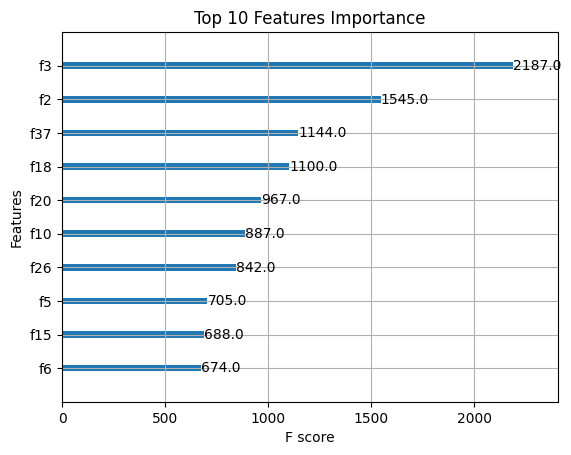

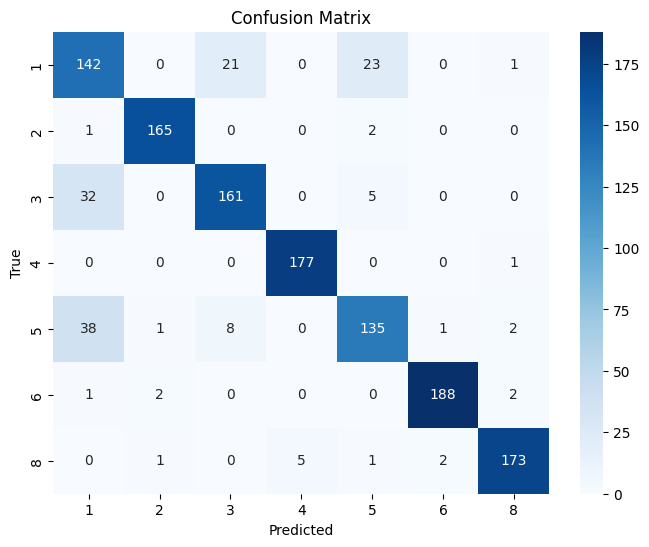

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\baseline data.csv")

# Define independent (X) and target variable (y)
X = df.iloc[:, 3:-1].values  # Excluding first 3 columns and last column as target
y = df.iloc[:, -1].values    # Target variable is the last column

# Step 1: Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Using mean imputation
X_imputed = imputer.fit_transform(X)

# Step 2: Encode class labels to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts y to sequential numbers

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_encoded)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 5: Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

# Step 9: Save the Model and Encoders
model_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl"
label_encoder_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl"
scaler_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\scaler.pkl"
imputer_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\imputer.pkl"

joblib.dump(model, model_save_path)
joblib.dump(label_encoder, label_encoder_save_path)
joblib.dump(scaler, scaler_save_path)
joblib.dump(imputer, imputer_save_path)

print(f"Model saved to: {model_save_path}")
print(f"Label encoder saved to: {label_encoder_save_path}")
print(f"Scaler saved to: {scaler_save_path}")
print(f"Imputer saved to: {imputer_save_path}")

# Visualization Section
# 1. Class Distribution Before SMOTE on the Training Data
plt.figure(figsize=(12, 6))

# Plot original class distribution with counts (before SMOTE)
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train)
plt.title("Class Distribution (Before SMOTE)")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Apply SMOTE only on the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot resampled class distribution with counts (after SMOTE)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_resampled)
plt.title("Class Distribution (After SMOTE)")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Feature Importance Plot (XGBoost)
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='weight', title='Top 10 Features Importance')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data first (BEFORE applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling (After SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Only transform test set (no fitting)


C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [10:50:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.5363

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.74      0.68       185
           2       0.00      0.00      0.00         8
           3       0.46      0.39      0.43        66
           4       0.33      0.15      0.21        13
           5       0.41      0.38      0.39        74
           6       0.44      0.46      0.45        24
           8       0.38      0.38      0.38        29

    accuracy                           0.54       399
   macro avg       0.38      0.36      0.36       399
weighted avg       0.51      0.54      0.52       399



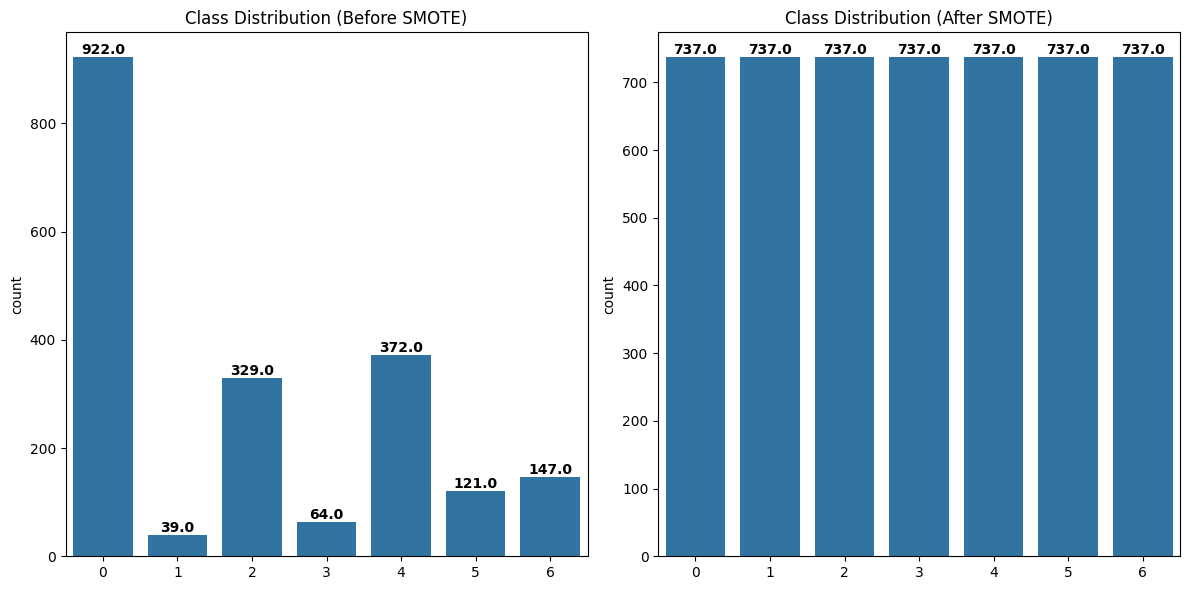

<Figure size 1000x600 with 0 Axes>

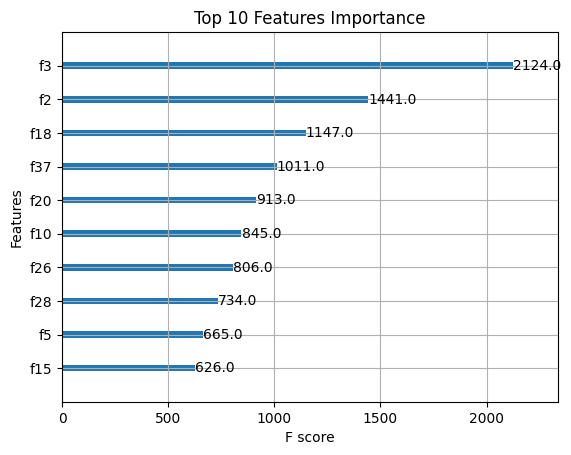

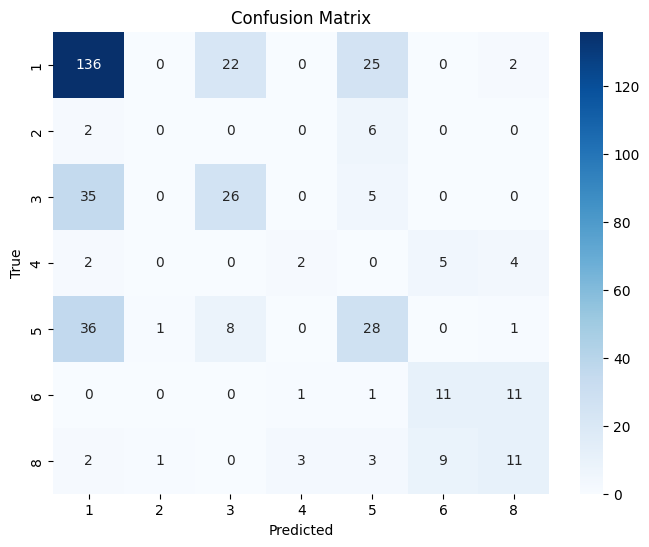

Model saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl
Label encoder saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl
Scaler saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\scaler.pkl
Imputer saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\imputer.pkl


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import joblib

# Load your dataset
df = pd.read_csv(r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\baseline data.csv")

# Define independent (X) and target variable (y)
X = df.iloc[:, 3:-1].values  # Excluding first 3 columns and last column as target
y = df.iloc[:, -1].values    # Target variable is the last column

# Step 1: Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Using mean imputation
X_imputed = imputer.fit_transform(X)

# Step 2: Encode class labels to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts y to sequential numbers

# Step 3: Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 4: Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Only transform test set (no fitting)

# Step 6: Train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train_resampled)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Step 8: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

# Step 9: Visualizations

# 1. Class Distribution Before and After SMOTE
plt.figure(figsize=(12, 6))

# Plot original class distribution with counts
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_encoded)
plt.title("Class Distribution (Before SMOTE)")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Plot resampled class distribution with counts
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_train_resampled)
plt.title("Class Distribution (After SMOTE)")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Feature Importance Plot (XGBoost)
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='weight', title='Top 10 Features Importance')
plt.show()

# 3. Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 10: Save the Model and Encoders
model_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl"
label_encoder_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl"
scaler_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\scaler.pkl"
imputer_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\imputer.pkl"

joblib.dump(model, model_save_path)
joblib.dump(label_encoder, label_encoder_save_path)
joblib.dump(scaler, scaler_save_path)
joblib.dump(imputer, imputer_save_path)

print(f"Model saved to: {model_save_path}")
print(f"Label encoder saved to: {label_encoder_save_path}")
print(f"Scaler saved to: {scaler_save_path}")
print(f"Imputer saved to: {imputer_save_path}")
